# Assignment 2: Predicting Minimum and Maximum PC prices


## 1. Problem Description

(Idee achter deze tekst:
-interessante,  aandacht trekkende openener die het idee van de paper samenvat
-Algemene info geven over de data, input and output
-Exploration of original data
)

The goal of this paper is to create a predictive model to estimate the minimal and maximal price of different laptops in the three weeks following the prediction. In order to achieve this the model must be able to accurately predict both the value of the computer and which computers tend to fluctuate in price.
First, a short introduction to the data set will be given. Afterwards the given features will be interpreted and explored. Finally, a short conclusion will be given to  make way for the pre-processing, where more features will be added.

The data behind de model is tabular having around 500 instances and 20 features. Two of these features (“min price” and “max price”) are the output variables.<br>
The input variables:
The dataset consists of mainly categorical and nominal data. One example is “CPU type” (i3 or i5 or i7 or ...) which consists of discrete values. Another example is ram which is also nominal since it can only take a few values: 2, 4, 3, 6, 8, 12, 16, 32, or 64GB. 
The only numerical input variables is “weight”. Later on, however, a few extra numerical input variables will be engineered.<br>
The output variables:
The model becomes more complex because it needs to predict two target variables, a minimum and a maximum price, for every instance. These output variables are neither categorical nor nominal, they are numerical (continuous) variables. This already eliminates the use of relatively straight forward binary decision tree modelling.

From the train set another additional test set is split off. This new test set can be used to estimate the accuracy of the model and uncover possible flaws in it.
The variables will be explored in the following manner: Firstly the design related features, secondly the basic components, thirdly the cpu and finally the gpu.

XXXXXXXXXXX Only the interesting or note worthy features will be put forward. ??? XXXXXXXXX
XXXXXXXX Histograms, correlation met uitleg komen eraan XXXXXXXXXXXXX

<br>
<br><b>Design related features</b><br>
Screen_size (in inch): The laptop market has relatively standardized screen sizes: 11.6, 13.3, 14, 15.6 and 17.3, with 15.6 being the most common one. This is clearly reflected in the data.<br>

Pixel_x and pixel_y: These two variables have a very strong correlation of 98%. This comes as no surprise as most screens nowadays have a screen ratio of 16:9. 1920 Pixels, which is full HD, is most commen, followed by 1366, a typical mid ranged laptop's resolution. The right hand side tail consists of high-end monitores such as 4K.
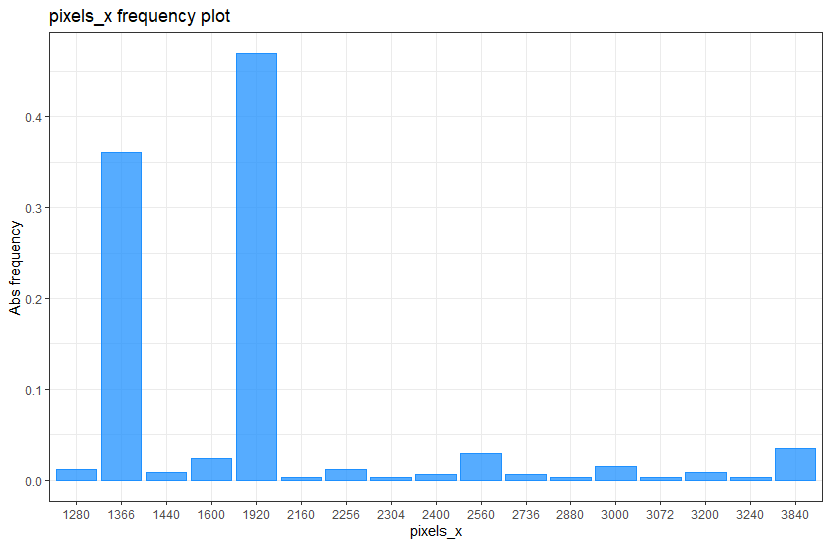
XXXXXXX om grootte aan te passen moet je bij het downloaden de juiste witdth proberen in te schatten. Te klein kan je de assen niet meer onderscheiden XXXXXXXX

Screen_surface: Glossy and matte screen surfaces both have advantages and disadvantages. Their pricing point is also similar. This is reflected in the graph.

Touchscreen: A more and more common trait with laptops.

Weight: The heavier laptops have more components such as extra storage, a discrete laptop gpu and even a discrete desktop gpu.

Detachable keyboard: A more uncommon trait with laptops. A typical example would be a Microsoft Surface Book,which emulates a tablet when the keyboard is detached.

Brand: Gives a nice overview of the laptop market share. Note the brands such as Jumper and RCA. These are uncommon brands in the belgian market. They also make their own core and graphical processors, but more on that later.

<br>
<br><b>Basic features</b><br>
RAM: Short term memory comes in very standardised numbers (a power of 2) from 2 up to 64 with a few exceptions. As reflected by the graph the most common configuration is with 8GB. Simpeler computer have 4 GB and computers oriented towards gaming or video editing often have 16 or 32GB.

SSD: Solid state drives are becoming the norm as well. Similar to RAM they usually come in a power of 2 as well. Note that 8 to 128GB are typical configuations for Chromebooks, where 128 and higher are typical for other laptops.

Storage: Consists of both the slower HDD and the faster SSD. 
XXXX Niet in training set XXXXXXXXXXXX

OS: The operating system market is strongly dominated by Windows. Apple has its own MACOS abd Chromebooks have their own Chrome OS. There are a few tiny other players.
XXXX Niet in training set XXXXXXXXXXXX

OS details: Specifies the OS in more detail, but here also there are very dominant versions.
XXXX Niet in training set XXXXXXXXXXXX

<br>
<br><b>CPU features</b><br>
cpu:
cpu_details:

<br>
<br><b>GPU features</b><br>
discrete gpu:
gpu:


<br>
<br>
<br>
<br>
XXXXXX old text XXXXXXXXXXX

<b> The Input Variables: </b><br>
The dataset consists of mainly categorical and nominal data. Some examples are CPU type (i3 vs i5 vs i7) which are discrete values. The ram and storage size are also nominal since they can only take a few values: 8gb vs 16gb vs 32gb and 128gb vs 256gb vs 512gb. <br>
The only numerical input variables are *__weight__* and *__cpu clock speed__*. But even the clock speed only takes on a couple of discrete numerical values. 

<b> The Output Variables: </b><br>
The problem becomes more complex because the model needs to predict two target variables, a minimum and a maximum price, for every instance. These output variables are neither categorical nor nominal, they are numerical (continuous) variables. This already eliminates the use of relativly straight forward binary decision tree modelling. 


## 2. Preprocessing

Preprocessing is critically important to extract useful features from the input data. Below some of the possibly useful features, for which data is available, are determined.

XXXXXXXXXX Zal ik van de nieuwe features hier soms ook een plot en correlatie enzo geven? XXXXXXXXXXX

<b> Extracting useful features: </b><br>
There are a few features in the data set that contain interesting data, but are very detailed. Take for example "cpu". Two values for this feature are:<br>
INTEL CORE I7<br>
AMD A6<br>
It might be beneficial to turn these into two seperate features: "cpu_brand" & "cpu_type name". The result is:<br>
INTEL & CORE I7<br>
AMD & A6<br>
Although "cpu_type_name" contains almost identical information as the original feature, "cpu_brand" is more high level with fewer possible values. "gpu" Gets the same treatment.<br>
Another important feature to extract data from is "cpu_details". This feature on itself is not very useful because it has a vast amount of possible values. In other words, it is a high-level categorical. Parts of the cpu's details, however, would yield very consistent, lower level categoricals. Two values for this feature are:<br>
INTEL CORE I7-8750H 2.2 GHZ (8TH GEN COFFEE LAKE HEXA-CORE WITH HYPER-THREADING)<br>
AMD RYZEN 3 2200U 2.5 GHZ (DUAL-CORE WITH SIMULTANEOUS MULTI-THREADING)<br>
The first two parts, cpu's brand and cpu's type, are already captured in previous variables. Other extractable features are the processor code, GHz, generation, cpu architecture, number of cores and threading configuration. Unfortunately, generation and cpu architecture are only available to Intel processors. Too many missing values would appear creating these variables. The features "cpu_details_2", "cpu_GHZ", "cpu_core" and "and "threading" are extracted. For the latter it is interesting to note that although there are three possible classes (no threading, hyper threading and multi threading) the new  feature is binary: threading yes or no. As it turns out, hyper threading is patented by Intel, therefore AMD calls their very similar technology multi threading. As we already have an Intel or AMD feature, making a distinction between the two threadings would not add any new information.
Finally, another possibly very usefull feature is extracted: "pc_name" from "base_name". This is the most diffult feature to extract because the final feature still contains rather many possible values. The idea is to single out the brand and the series of the computer, f.e. Dell inspiron, Dell lattitude or Dell XPS. Although, you could buy a lattitude or an XPS with almost identical components, such as cpu, gpu, ssd, memory, storage,... , there is still a significant price difference and possible price volatitlity because of the build quality, design and warranties included. This feature tries to capture those differences.
<br>
<br>
In part 3 modelling approach, more detail will be given regarding the features used in the final model.


<br>
<br>
XXXXX  Bij sommige vorige niet fantastische features vermelden als ze nodig waren om externa data te linken XXXXXXX <br>
XXXX Zijn OS_details_2 en cpu_details_2 eigenlijk nuttig? XXXXXX<br>




<b> Externe data </b><br>
As mentionned before, most features are categorical. On top of that, some of them have a wide range of possible values. These are called high-level categoricals. There are two very important components to a computer for which this is the case: cpu and gpu. They are key drivers in the price of any computer and making them more compareable and robust would be a great improvement.<br>
PassMark Software is a website that conducts a large amount of benchmarks and performance tests on WiFi conncection, software, hardware,... Althoug it is not ideal, with some basic Excell skills you can easily convert the data from the website to a neat table with the cpu name and its performance. cpu_benchmark and gpu_benchmark are added to the data table by using respectively cpu_details_2 and gpu_type.

XXXXXXXX de nodige aanpassingen van excell file toelichten? XXXXXXXXXXX<br>
XXXXXXXX opnieuw wat info over de nieuwe variabelen geven: frequenties, corr, intuitie,... XXXXXXXXXX<br>
<br>
<b> Overview of extracted features </b><br>
Here you can find an overview of all extracted features and the features they were derived from. This will also be very usefull when looking at missing values in the next section. Whenever a "mother" variable is missing, the derived variable will not be defined either.<br>
<br>

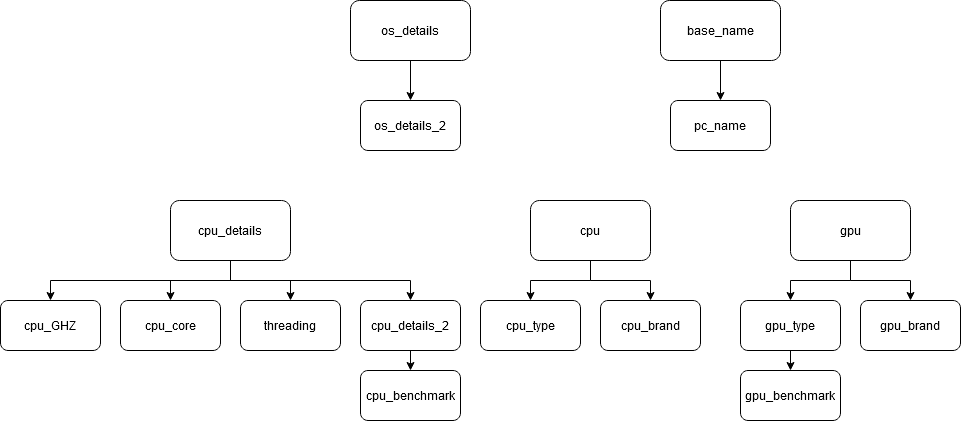

<br>

<b> Missing values </b><br>
XXXXXXXX Ik zal hier dan wss enkel spreken over de features die in het finaal model zitten XXXXXXXXXX

<br>
<br>

<b> Other interesting findings </b><br>
XXXXXXXX Reserve paragraaf :) XXXXXXXXXX
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<b> Extracting useful features: </b>
- CPU brand
- CPU type (i3, i5, i7, Ryzen 5, Ryzen 7, etc)
- CPU clock speed (GHz)
- CPU number of cores (Dit is uiteindelijk niet gebeurd?)
- GPU type (GTX, RTX, Radeon, etc)
- OS version (7, 8.1, 10, Yosemite, Mojave)

<b> Externe data </b><br>
to fix "high-level categoricals"
- CPU benchmark
- GPU benchmark

<b> Missing values </b>
   

## 3. Modelling Approaches

The model needs to be able to predict two values. A minimum price and a maximum price. Because these values are numerical, not all models are suitable for this. Below is a list of possible models that can be used. In general, because there are two targets, a decision must be made whether to use two models or a single model.<br>

<b> Possible models : </b>
- **Single Target Regression Trees:** Use input variables to devide data and fit simple local models at each leaf node of the tree. Two regression trees can be used to predict the two targets. One tree to predict the minimum value and another to predict the maximum value. Generalizes well in case of missing or new data: combine the leaf nodes.<br>


- **Multi Target Regression:**  Trees able to predict multiple continuous targets at once. A multi-target regression tree better identifies the dependencies between the different target variables than a single-target regression tree and is often smaller than the two single-target trees combined.<br>


- **Random Forest Multi Target Regression:** This is booklet of many different trees for which the predictions are combined. This technique is much more robust against noice and prevents overfitting.


- **Multi Output Neural Networks:** An artificial neural network with two output nodes. One node for the minimum price and one for the maximum price.

- **Multi Regressor SVR:**



## 4. Random Forest Multi Target Regression

<b> Multi Target Regression </b>

When comparing building multiple single-target regression models or one multi-target regression model, multiple advantages for a multi-target regression model can be found. Assuming that the minimum and maximum price, the two predictions we are looking for, are strongly correlated -which is realistic- there is a strong tendency to prefer a multi-target regression model since this model takes into account the correlation between the outputs and will therefore give a more accurate model. 
Another advantage of a multi-target regression model is that it will produce a simpler model than two single-target regression models and will therefore also have a better computational efficiency.
Further, it is usually also easier to interpret one multi-target model than to interpret several different single-target models. 


<b> Random Forest </b>

The performance of the model can be improved by using the random forest technique in order to make sure our model doesn’t overfit on the training data. A random forest adds to bagging that in every node only a subset of features is used to choose a split.
